# **Problem Statement:**

Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The task is to classify these images into an apparel category amongst 10 categories on which the dataset is benchmarked.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)# Images in train
print(x_test.shape)
print(y_train.shape)# Target variable for train data
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Label	Description
0	T-shirt/top,
1	Trouser,
2	Pullover,
3	Dress,
4	Coat,
5	Sandal,
6	Shirt,
7	Sneaker,
8	Bag,
9	Ankle boot,


# **Objectives:**

Data Preparation and Visualization:

● Load the Fashion MNIST dataset.

● Visualize different samples from the dataset.

● Normalize the pixel values of the images to be between 0 and 1 for better
model performance.

● Convert the output labels to categorical format for classification.

In [ ]:
classes = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

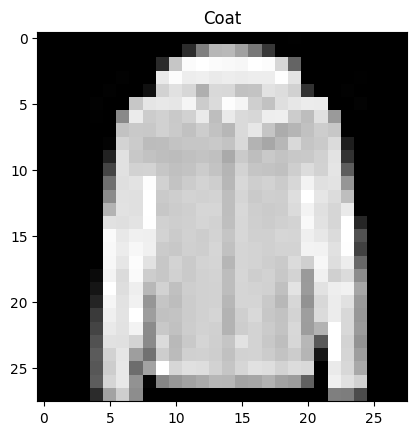

In [ ]:
n=5000
plt.imshow(x_train[n], cmap="gray")
plt.title(classes[y_train[n]])
plt.show()

**Normalizing the pixel values of the train and test images**

I mentioned that each image in the dataset consists of 28x28 pixels. Each pixel that makes up a picture takes a number value in the range of 0-255. We can think of it as a 28x28 matrix with values around that range. Since we are using a greyscale image, it will be single-channel, ie black and white.
Then we scale these pixel values between 0 and 1. To do this, we divide all pixel values by 255.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Convert the output labels to categorical format for classification.

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
## For CNN's data needs to available in a specific shape

'''
input_shape = (n, w, h, c)

n = number of images
w = width
h = height
c = channels

(60000, 28, 28, 1)

'''

x_train = x_train.reshape(60000, 28, 28, 1).astype("float")
x_test = x_test.reshape(10000, 28, 28, 1).astype("float")


**Model Building and Training:**

Construct a Neural Network using TensorFlow and Keras.

● The model should consist of multiple dense layers with a significant number of
neurons.

● Utilize ReLU activation for hidden layers and softmax activation for the output layer.

● Train the model on the prepared dataset.

● Implement callbacks, particularly TensorBoard, to visualize the training process.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import tensorflow as tf


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu")) # 28x28x1
# model.add(Activation("relu")) # 26x26x4 - Added activation function in the conv layer param
model.add(MaxPool2D(pool_size = (2,2))) # 13x13x4
model.add(Flatten())# 13x13x4 = 676 Units in each image
model.add(Dense(10, activation= "softmax")) # Output for 10 class classfn

# **Model Training:**

● Train the model on the preprocessed training data, using categorical
cross-entropy as the loss function, stochastic gradient descent as the
optimizer, and accuracy as the evaluation metric.

● Utilize a validation split to monitor the model's performance on unseen
data during training.

In [ ]:
#model.compile(optimizer="adam",
#              loss="categorical_crossentropy",
 #             metrics="accuracy")

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/tboard")

In [24]:
model.fit(x=x_train, y=y_train_ohe, epochs=10, validation_data=(x_test, y_test_ohe), batch_size=1000,callbacks=[tensorboard])

Epoch 1/10
60/60 [==============================] - 10s 164ms/step - loss: 0.6436 - accuracy: 0.7790 - val_loss: 0.6575 - val_accuracy: 0.7689
Epoch 2/10
60/60 [==============================] - 9s 142ms/step - loss: 0.6270 - accuracy: 0.7850 - val_loss: 0.6445 - val_accuracy: 0.7726
Epoch 3/10
60/60 [==============================] - 10s 173ms/step - loss: 0.6126 - accuracy: 0.7897 - val_loss: 0.6303 - val_accuracy: 0.7769
Epoch 4/10
60/60 [==============================] - 10s 162ms/step - loss: 0.6004 - accuracy: 0.7933 - val_loss: 0.6183 - val_accuracy: 0.7818
Epoch 5/10
60/60 [==============================] - 10s 170ms/step - loss: 0.5899 - accuracy: 0.7964 - val_loss: 0.6092 - val_accuracy: 0.7841
Epoch 6/10
60/60 [==============================] - 9s 145ms/step - loss: 0.5803 - accuracy: 0.7983 - val_loss: 0.6026 - val_accuracy: 0.7872
Epoch 7/10
60/60 [==============================] - 10s 162ms/step - loss: 0.5716 - accuracy: 0.8010 - val_loss: 0.5918 - val_accuracy: 0.7913
E

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 4)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Model Evaluation and Analysis:**

● Evaluate the model's performance using a validation set.

● Analyze the training process with the help of TensorBoard.

● Save the trained model, including its architecture and learned weights.


In [22]:
print(model.evaluate(x_test, y_test_ohe))

313/313 [==============================] - 2s 6ms/step - loss: 0.6736 - accuracy: 0.7636
[0.6735782027244568, 0.7635999917984009]


TensorBoard writes the logs to a file in a directory of your choice, usually, ./logs/. We must define the writer.

Finally, we can launch tensorboard from the command line. It will run on localhost.

$tensorboard --logdir=./path/to/your/directory --port=6006

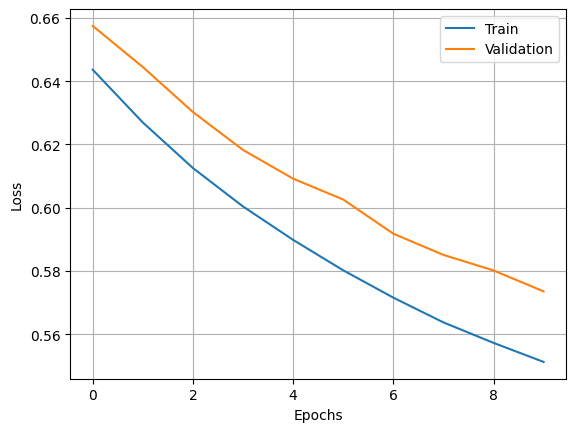

In [25]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

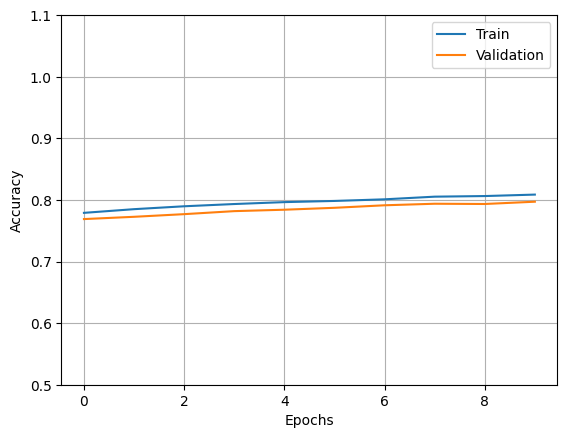

In [26]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

**Conclusion:**

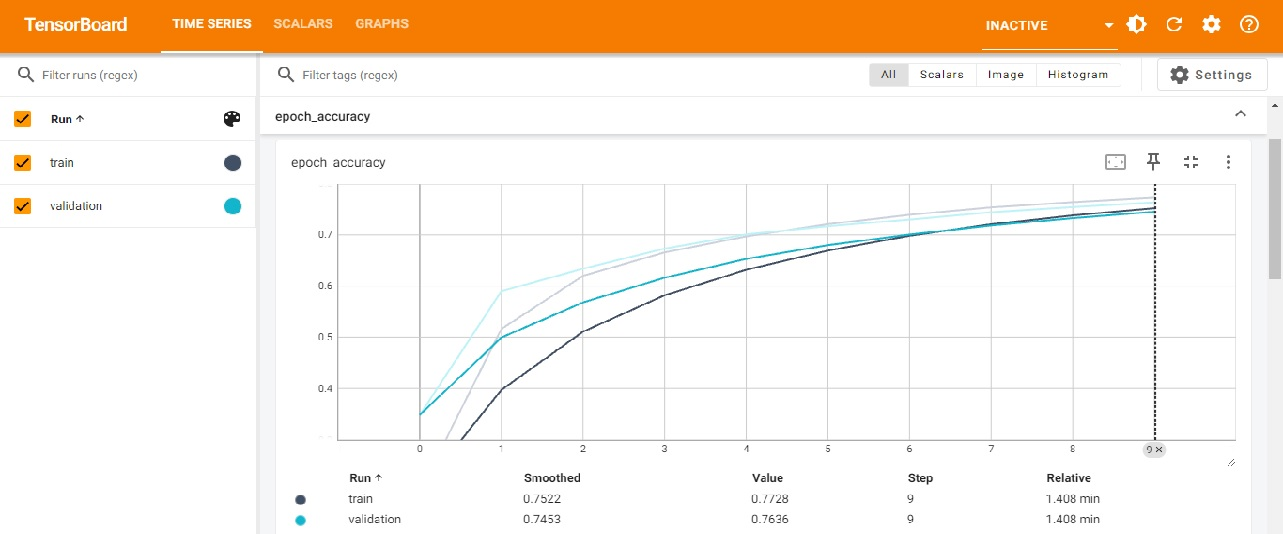

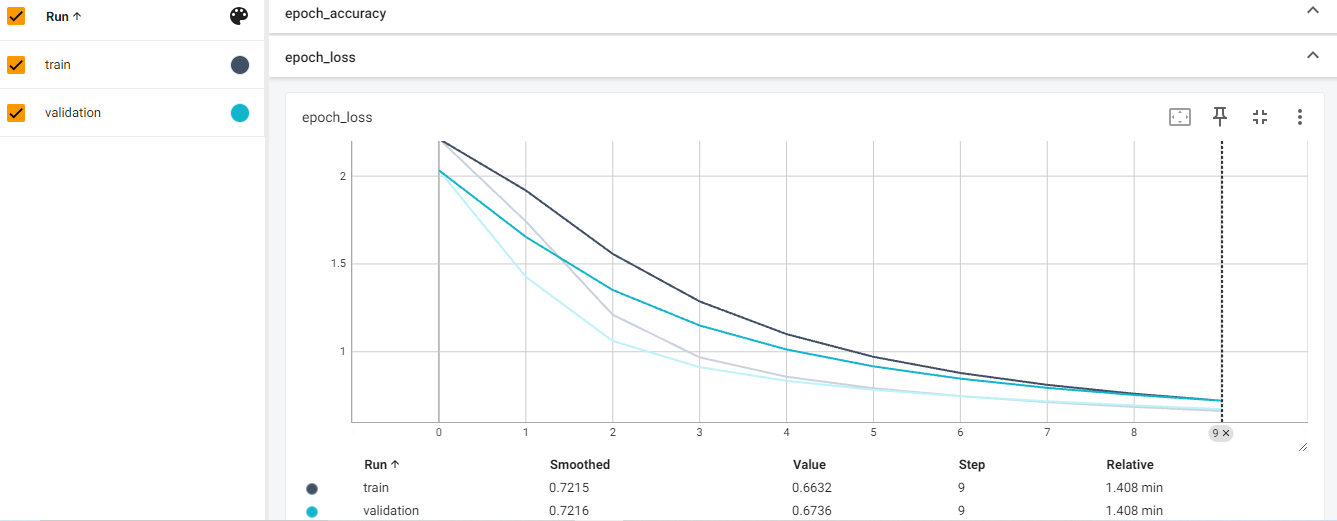

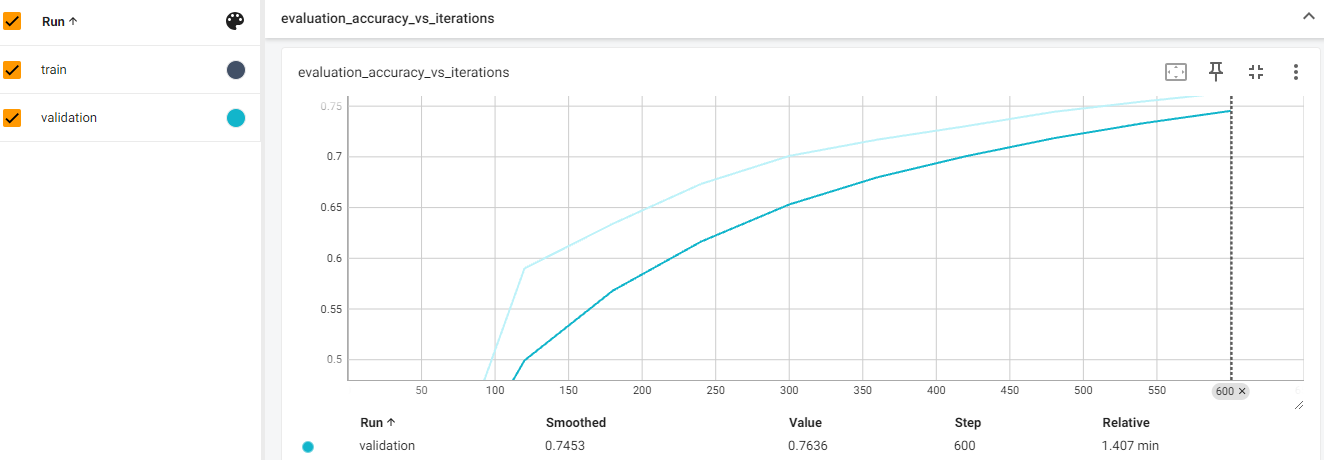

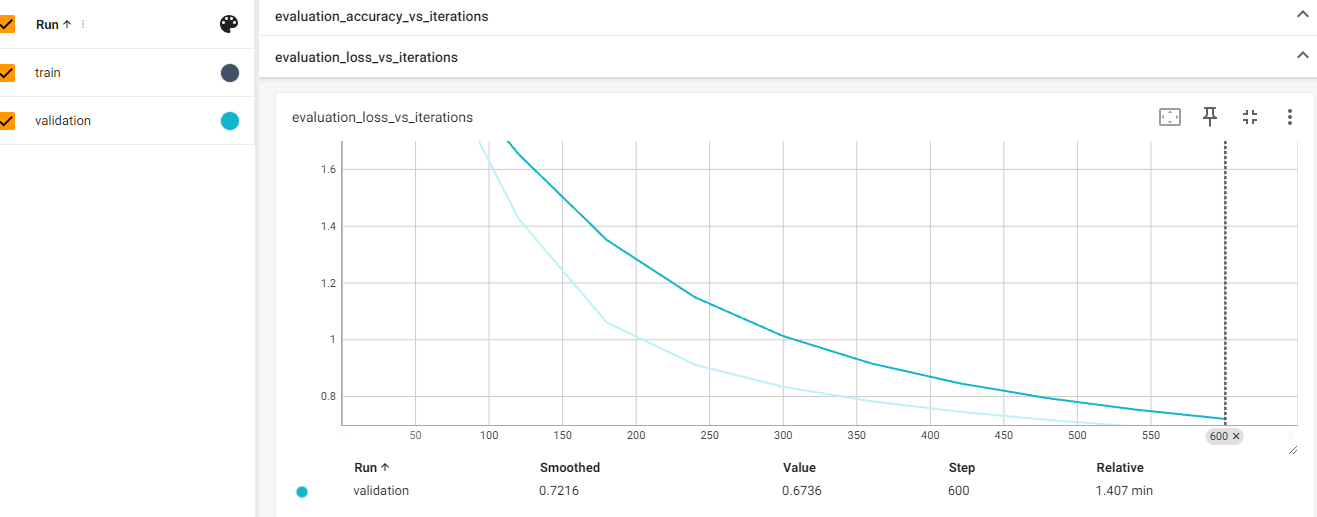